In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('titanic-passengers.csv', delimiter=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### DATA PREPROCESS

In [3]:
data.Cabin=data.Cabin.fillna(data.Cabin.mode()[0])

In [4]:
data.Embarked=data.Embarked.fillna(data.Embarked.mode()[0])

In [5]:
data.Age=data.Age.fillna(data.Age.mean())

In [6]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
data.Survived=data.Survived.map({'Yes':int(1),'No':int(0)})

# DATA VIZ

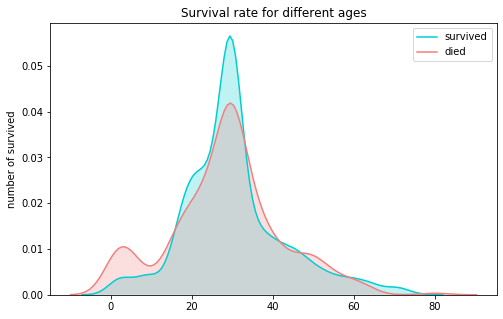

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(data.Age[data.Survived==0],color='darkturquoise', shade=True)
sns.kdeplot(data.Age[data.Survived==1],color='lightcoral',shade=True)
plt.title('Survival rate for different ages')
plt.ylabel('number of survived')
plt.legend(['survived','died'])
plt.show()

most youngsters aged between 0 and 15 survived while those between 15 and 60 mostly died 

the younger the person is , the highe chance of survival they have 

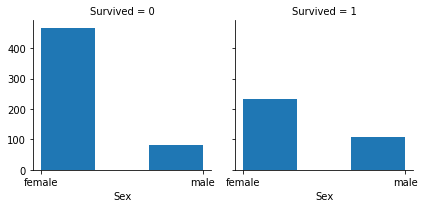

In [51]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Sex', bins=3)

females are more likely to survive than men 

In [52]:
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Age Histogram')

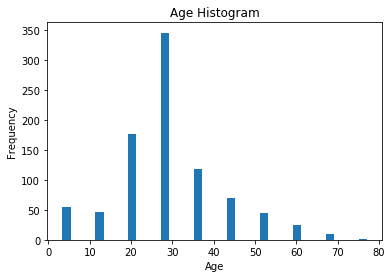

In [53]:
plt.hist(data['Age'],bins=10,rwidth=0.25,)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Histogram")

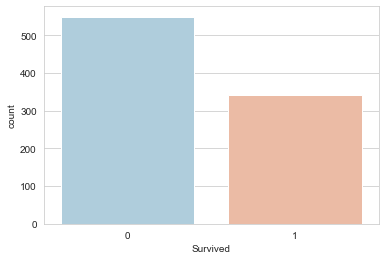

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r');

those who died are more than those who survived 

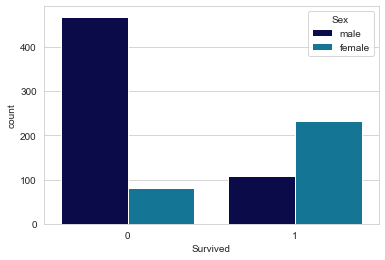

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='ocean');

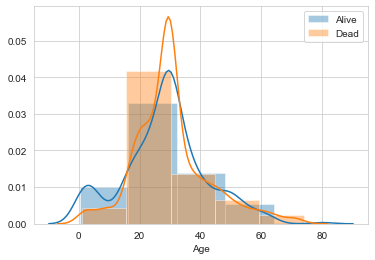

In [58]:
sns.distplot(a=data[data['Survived']==1]['Age'],label='Alive',bins=5)
sns.distplot(a=data[data['Survived']==0]['Age'],label='Dead',bins=5)
plt.legend()

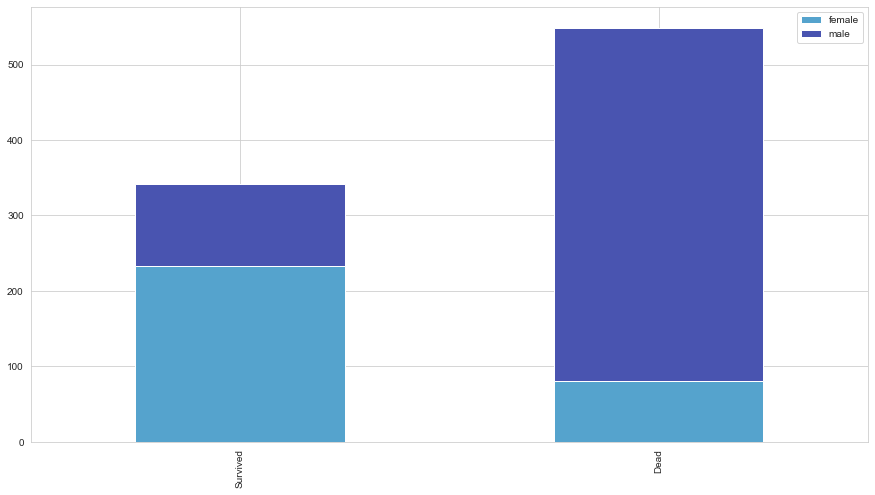

In [68]:

sns.set_palette('icefire')
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))



Text(0.5, 1.0, 'number of siblings or spouses')

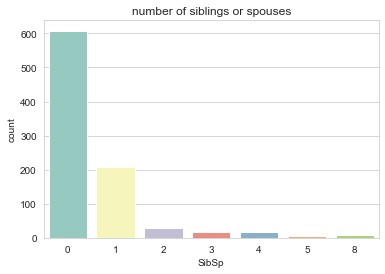

In [65]:
sns.set_palette('Set3')
sns.countplot(data['SibSp'])
plt.title('number of siblings or spouses')

Text(0.5, 1.0, 'number of parents or children ')

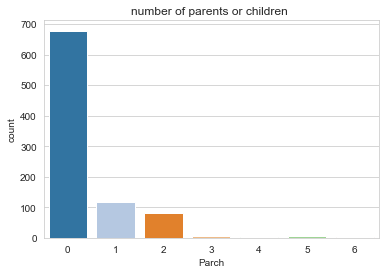

In [70]:
sns.set_palette('tab20')
sns.countplot(data['Parch'])
plt.title('number of parents or children ')

most of the passengers came alone and have no children nor parents nor spouses 

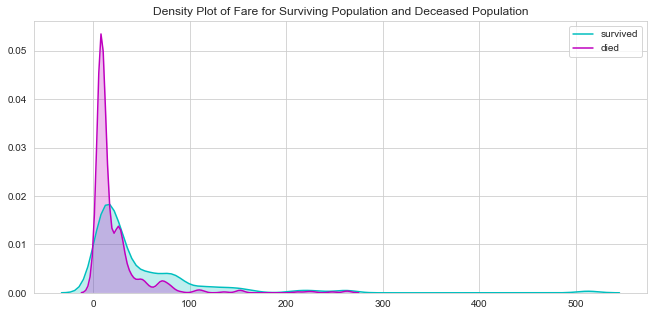

In [74]:


plt.figure(figsize=(11,5))
sns.kdeplot(data["Fare"][data.Survived == 1], color="c", shade=True)
sns.kdeplot(data["Fare"][data.Survived == 0], color="m", shade=True)
plt.legend(['survived', 'died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.show()



([<matplotlib.axis.XTick at 0x1dc58df5108>,
 <a list of 3 Text xticklabel objects>)

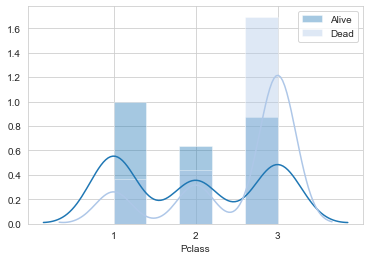

In [75]:
sns.distplot(a=data[data['Survived']==1]['Pclass'],label='Alive',bins=5)
sns.distplot(a=data[data['Survived']==0]['Pclass'],label='Dead',bins=5)
plt.legend()
plt.xticks([1,2,3])

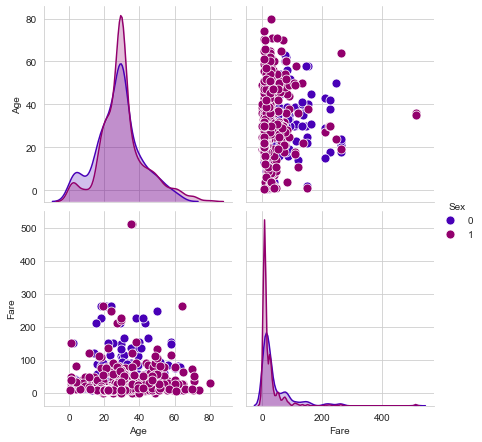

In [103]:
sns.set_palette('brg')
sns.pairplot(data=data,vars=['Age','Fare'], diag_kind ="kde",hue = "Sex",height=3,plot_kws = { 's': 80, 'edgecolor': 'white'})

<Figure size 864x432 with 0 Axes>

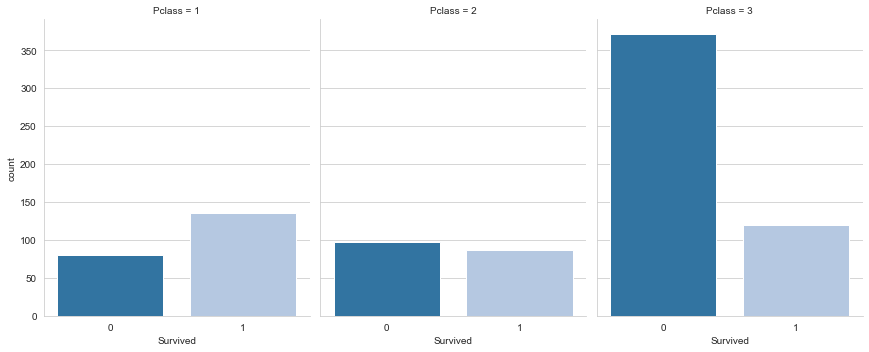

In [105]:
fig = plt.figure(figsize = (12, 6))
ax = sns.catplot("Survived", 
                 col = "Pclass", 
                 data = data, 
                 kind = "count",  
                 palette = 'tab20',  
                 aspect = .8)

## preprocess 

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
data.Sex=encoder.fit_transform(data.Sex)
data.Sex.astype(int)

0      1
1      1
2      1
3      0
4      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Sex, Length: 891, dtype: int32

In [10]:
data.Embarked=encoder.fit_transform(data.Embarked)
data.Embarked.astype(int)

0      2
1      2
2      2
3      2
4      2
      ..
886    0
887    0
888    2
889    2
890    2
Name: Embarked, Length: 891, dtype: int32

In [14]:
data.Cabin.unique()

array(['B96 B98', 'F G73', 'B71', 'C82', 'C93', 'B41', 'C95', 'B38',
       'C52', 'A32', 'C111', 'C2', 'E101', 'D17', 'B22', 'B3', 'C45',
       'B78', 'A31', 'C128', 'C30', 'A26', 'C22 C26', 'D15', 'T', 'C54',
       'C103', 'C125', 'D20', 'C78', 'E24', 'B82 B84', 'E12', 'D9', 'D28',
       'D19', 'G6', 'D48', 'C90', 'D56', 'E33', 'B86', 'F2', 'B77', 'B39',
       'F33', 'D26', 'C85', 'A34', 'C92', 'F G63', 'D45', 'D', 'C91',
       'B79', 'D21', 'C32', 'C83', 'C47', 'B58 B60', 'E38', 'B28', 'E58',
       'A16', 'B20', 'C126', 'E77', 'C65', 'C123', 'C68', 'B35', 'B5',
       'C46', 'E10', 'B51 B53 B55', 'E68', 'B49', 'B30', 'F E69',
       'D10 D12', 'B57 B59 B63 B66', 'D11', 'D36', 'C99', 'D7',
       'C23 C25 C27', 'C106', 'B19', 'C124', 'E8', 'A23', 'A10', 'E31',
       'B73', 'B18', 'E46', 'D50', 'F38', 'B37', 'A7', 'A5', 'E67', 'D33',
       'C118', 'C7', 'A36', 'C62 C64', 'E34', 'D6', 'A6', 'B101', 'E44',
       'C70', 'A20', 'E121', 'C87', 'C50', 'B4', 'C104', 'C148', 'A14',
 

In [90]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

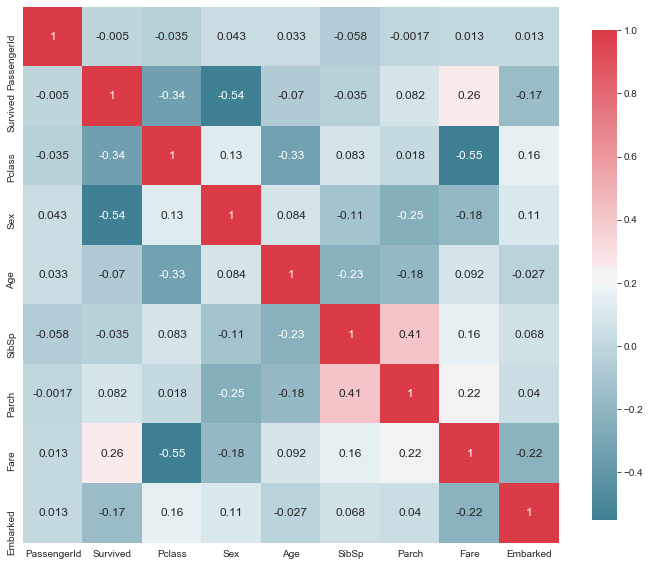

In [91]:
plot_correlation_map( data)

In [92]:
data.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [11]:
newdata=data.drop(['Name','Cabin','Ticket','PassengerId'],axis=1)
newdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28.0,0,0,13.0000,2
1,0,3,1,25.0,0,0,7.6500,2
2,0,3,1,20.0,0,0,7.8542,2
3,0,3,0,29.0,0,4,21.0750,2
4,0,1,1,31.0,1,0,52.0000,2


## Extracting title

In [143]:
data.Name.unique()[0:10]

array(['Collander, Mr. Erik Gustaf', 'Moen, Mr. Sigurd Hansen',
       'Jensen, Mr. Hans Peder',
       'Palsson, Mrs. Nils (Alma Cornelia Berglund)',
       'Davidson, Mr. Thornton', 'Gustafsson, Mr. Anders Vilhelm',
       'Patchett, Mr. George', 'Nakid, Miss. Maria ("Mary")',
       'Lovell, Mr. John Hall ("Henry")',
       'Louch, Mrs. Charles Alexander (Alice Adelaide Slow)'],
      dtype=object)

In [12]:
df1=[]
df2=[]
for i in range(0,len(data.Name)):
    k=data['Name'][i].split(',')
    df1.append(k)

In [13]:
for i in range(0,len(df1)):
    t=df1[i][1].split('.')
    df2.append(t)

In [14]:
Title=[]
for i in range(0,len(df2)):
    title=df2[i][0]
    Title.append(title)

In [15]:
data['Title']=Title

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,B96 B98,2,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,2,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,B96 B98,2,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,B96 B98,2,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,2,Mr


In [21]:
data.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Dr', ' Major', ' Don', ' Master', ' Rev',
       ' Col', ' Mlle', ' Lady', ' Jonkheer', ' Mme', ' Sir', ' Capt',
       ' the Countess', ' Ms'], dtype=object)

Text(0.5, 1.0, 'Titles Count')

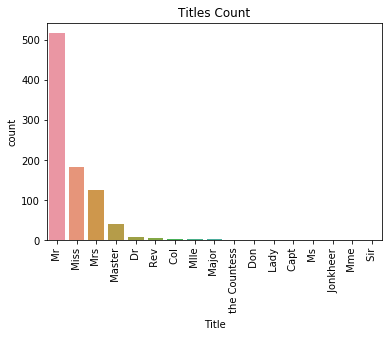

In [19]:
sns.countplot(data.Title,order= data.Title.value_counts().index)
plt.xticks(rotation=90)
plt.title('Titles Count')

In [17]:
data["Title"]=data["Title"].map ({" Capt":       "Officer",
                    " Col":        "Officer",
                    " Major":      "Officer",
                    " Dr":         "Officer",
                    " Rev":        "Officer",
                    " Jonkheer":   "Royalty",
                    " Don":        "Royalty",
                    " Sir" :       "Royalty",
                    " Lady" :      "Royalty",
                    " the Countess": "Royalty",
                    " Dona":       "Royalty",
                    " Mme":        "Miss",
                    " Mlle":       "Miss",
                    " Miss" :      "Miss",
                    " Ms":         "Mrs",
                    " Mr" :        "Mrs",
                    " Mrs" :       "Mrs",
                    " Master" :    "Master"
                    })

In [18]:
data['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

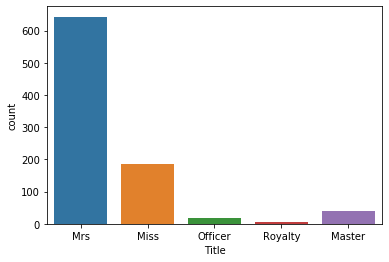

In [26]:
sns.countplot(data['Title'])

In [19]:
for values in data:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,B96 B98,2,Mrs,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,2,Mrs,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,B96 B98,2,Mrs,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,B96 B98,2,Mrs,5
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,2,Mrs,2


another method to extract familysize colomn is:


familysize=pd.DataFrame()


familysize[family]= df[parch]+df[sibsp]+1

In [32]:
data.groupby('FamilySize')[['Survived']].mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


this feauture is useful
in fact , it is better to have a family of 4 an less 
because it is much easier to find 3 places in a life boat  for example than to find 8 places  
which means this feature helps predict if the individual will survive or not

## MACHINE LEARNING 

####  1.LOGISTIC REGRESSION 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
 12  Title        891 non-null    object 
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(4)
memory usage: 90.6+ KB


In [20]:
data['Title']=encoder.fit_transform(data['Title'])
data['Title'].astype(int)

0      2
1      2
2      2
3      2
4      2
      ..
886    2
887    2
888    1
889    2
890    1
Name: Title, Length: 891, dtype: int32

In [21]:
from sklearn.linear_model import LogisticRegression 
loreg=LogisticRegression()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [22]:
x=data[['Sex','Age','FamilySize','Pclass','Embarked','Title']]
y=data[['Survived']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
loreg.fit(x_train,y_train.values.ravel())
y_pred=loreg.predict(x_test)
loreg.score(x_test,y_test)

0.8100558659217877

In [40]:
confusion_matrix(y_test,y_pred)

array([[93, 16],
       [18, 52]], dtype=int64)

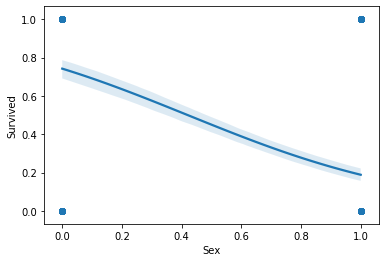

In [41]:
sns.regplot(x="Sex",y="Survived",data=data,logistic=True)

In [42]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       109
           1       0.76      0.74      0.75        70

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

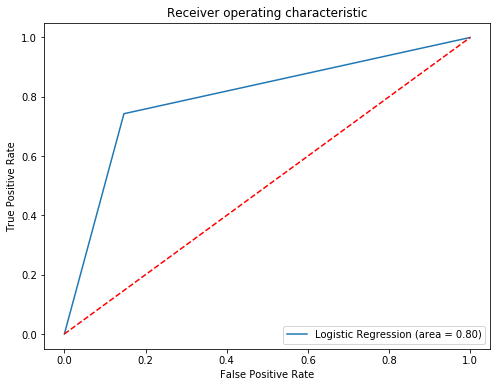

In [44]:
loreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr,_= roc_curve(y_test,y_pred )
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % loreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### 2. DECISION TREE 

In [23]:
from sklearn import tree 

In [24]:
classifier=tree.DecisionTreeClassifier(max_depth=100, max_leaf_nodes=2)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
predicted=classifier.predict(x_test)

In [26]:
print("score{}".format(classifier.score(x_train,y_train)))

score0.7668539325842697


In [27]:
print(metrics.accuracy_score(y_test,predicted))

0.8659217877094972


In [28]:
import graphviz

In [29]:
dot_data=tree.export_graphviz(classifier ,out_file=None,feature_names=x.columns )

In [30]:
graph=graphviz.Source(dot_data)

In [31]:
graph.render("data")

'data.pdf'

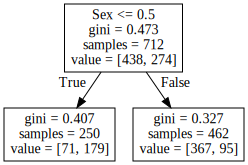

In [32]:
graph

#### 3.  RANDOM FOREST 

In [34]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators=[int(x) for x in np.linspace (start=200,stop=2000,num=10)]
random_grid={'n_estimators':n_estimators}

In [35]:
param_grid={
    'n_estimators':[100,200,300,500]
}
rf = RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs= -1,verbose =2)

In [39]:
grid_search.fit(x_train,y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    7.9s finished


{'n_estimators': 100}

In [40]:
from sklearn.ensemble import RandomForestClassifier 
rfclf=RandomForestClassifier(n_estimators=100)
rfclf.fit(x_train,y_train.values.ravel())
predicted=rfclf.predict(x_test)
metrics.accuracy_score(y_test,predicted)

0.8603351955307262